# Clusterização da Grande Base

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore') #ou warnings.filterwarnings(action='once')

In [33]:
uri = 'https://raw.githubusercontent.com/ieee-uerj/capes-data-analysis/develop/data/Grande%20Base%203.csv'

df_inicial = pd.read_csv(uri, encoding='latin-1')

## Análises Gerais

In [34]:
df = df_inicial.copy()
df.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,10001018002P1,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,TESE,0.0,NaN,0,21,15,10,25,0,25,1967.560000,UNIR,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,NaN,FEDERAL,1981.000000,NORTE,RO,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.0,0,13,14,8,22,0,22,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,20,14,8,22,0,22,1971.136364,UNIR,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,NaN,FEDERAL,1984.311111,NORTE,RO,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,18,13,7,20,0,20,1972.200000,UNIR,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,NaN,FEDERAL,1986.493827,NORTE,RO,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,TESE,1.0,NaN,0,21,14,8,22,0,22,1973.727273,UNIR,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,NaN,FEDERAL,1987.579439,NORTE,RO,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4


In [35]:
df.rename(columns={'OUTRO AUXÃÂLIO FINANCEIRO': 'OUTRO_AUXILIO_FINANCEIRO', 'SEM AUXÃÂLIO': 'SEM_AUXILIO', 'PÃÂBLICA_OU_PRIVADA':'PUBLICA_OU_PRIVADA'}, inplace = True)

## Analisando a variável alvo

In [36]:
df[df['CONCEITO_PROGRAMA'] != 7].describe()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO_AUXILIO_FINANCEIRO,SEM_AUXILIO,PUBLICA_OU_PRIVADA,QTD_FINANCIADORES
count,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,17910.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19222.000000,19222.000000,17910.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000
mean,2015.662332,26.377985,4.021433,21.783072,9.236644,12.546429,21.188368,0.594704,1.803204,15.246580,4.733288,21.635385,0.147688,18.858763,2.924309,1.121209,16.921344,3.216355,0.356292,0.167768,1.584456,4.025126,2.635125,0.816730,121.469551,0.326692,20.016855,12.546429,9.236644,21.188368,0.594704,21.783072,1966.227946,38.655621,46.907611,84.314103,1.249129,16.673724,3.928086,85.563232,0.445952,2.782187,30.392333,6.346186,1982.901670,4.021433,11120.619102,0.880664,48.239037,44.309213,3.929824,35.986214,17.763825,18.156895,0.065494,0.824377,4.047391
std,1.697176,14.538021,0.942504,9.991124,6.490336,7.375479,9.720924,1.117658,2.869065,10.156366,7.448214,9.933442,0.639039,8.995813,3.416977,1.898824,11.569415,6.253827,1.019801,0.586851,0.492828,0.940479,5.395862,0.386898,47.401419,1.629417,14.555143,7.375479,6.490336,9.720924,1.117658,9.991124,5.060578,36.599828,36.150357,59.767835,3.295254,4.658175,1.905894,60.867929,0.191016,1.974973,6.808843,3.292771,4.247676,0.942504,6340.788024,0.324192,40.062914,37.630277,5.949482,39.330737,24.287429,23.037909,0.806943,0.380509,2.845498
min,2013.000000,1.000000,1.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,5.000000,1944.750000,0.000000,0.000000,1.000000,0.000000,-6.206960,0.090909,1.000000,0.000000,0.027778,1.142857,0.032258,1965.457143,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,13.000000,3.000000,15.000000,5.000000,8.000000,15.000000,0.000000,0.000000,10.000000,0.000000,15.000000,0.000000,13.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,89.071429,0.000000,11.000000,8.000000,5.000000,15.000000,0.000000,15.000000,1962.730249,17.000000,23.000000,45.000000,0.000000,13.818921,2.590909,46.000000,0.307692,1.683118,25.166667,4.021344,1980.138889,3.000000,5683.500000,1.000000,23.000000,21.000000,0.000000,12.000000,3.000000,4.000000,0.000000,1.000000,2.000000
50%,2016

In [37]:
df[df['CONCEITO_PROGRAMA'] == 7].describe()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO_AUXILIO_FINANCEIRO,SEM_AUXILIO,PUBLICA_OU_PRIVADA,QTD_FINANCIADORES
count,918.000000,918.000000,918.0,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.0,918.000000,918.000000,888.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,888.000000,918.000000,918.0,918.000000,918.0,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,2015.697168,18.913943,7.0,38.450980,14.263617,24.186275,36.744009,1.706972,2.647059,26.607843,9.196078,38.180828,0.270153,29.772331,8.678649,1.799564,32.754902,2.396514,1.064270,0.435730,1.995643,7.0,1.992375,0.826797,135.209104,3.092593,38.413943,24.186275,14.264706,36.744009,1.706972,38.450980,1963.140047,97.911765,86.315904,177.432462,6.795207,21.861063,5.140273,184.227669,0.493945,4.870379,38.542501,4.358203,1985.001110,7.0,11385.842048,1.0,92.424837,87.491285,4.933551,97.533769,50.571895,46.921569,0.040305,0.936819,5.153595
std,1.736708,13.939901,0.0,19.668831,11.020364,15.599302,18.744358,2.554141,5.405846,19.257901,15.373954,19.511873,0.675964,16.694099,7.482747,2.985812,19.269083,6.256396,2.490814,3.690849,0.065902,0.0,0.087037,0.378629,45.725296,6.434057,20.468416,15.599302,11.020585,18.744358,2.554141,19.668831,4.093188,93.557987,49.535711,113.967832,10.665096,3.591752,2.493992,117.543947,0.187939,3.350322,4.747436,2.403399,3.238162,0.0,6434.732357,0.0,70.905533,68.297168,13.283953,81.338398,53.576032,44.333159,0.254745,0.243421,4.085155
min,2013.000000,1.000000,7.0,11.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.0,1.000000,0.000000,35.000000,0.000000,5.000000,0.000000,0.000000,9.000000,0.000000,11.000000,1945.176471,11.000000,11.000000,38.000000,0.000000,10.378205,1.441176,42.000000,0.119266,0.945295,23.848214,0.857143,1973.768212,7.0,671.000000,1.0,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,8.000000,7.0,24.000000,7.000000,14.000000,23.000000,0.000000,0.000000,14.000000,0.000000,24.000000,0.000000,18.000000,3.000000,0.000000,20.000000,0.000000,0.000000,0.000000,2.000000,7.0,2.000000,1.000000,105.233553,0.000000,24.000000,14.000000,7.000000,23.000000,0.000000,24.000000,1960.471154,44.250000,52.000000,106.250000,1.000000,19.406680,3.503571,111.000000,0.349360,2.911201,35.285794,2.511942,1983.069937,7.0,5206.500000,1.0,41.000000,40.000000,0.000000,42.000000,13.000000,16.000000,0.000000,1.000000,3.000000
50%,2016.000000,15.000000,7.0,33.500000,11.000000,20.000000,32.000000,1.000000,1.000000,23.000000,2.000000,33.000000,0.000000,26.000000,7.000000,1.000000,28.000000,0.000000,0.000000,0.00

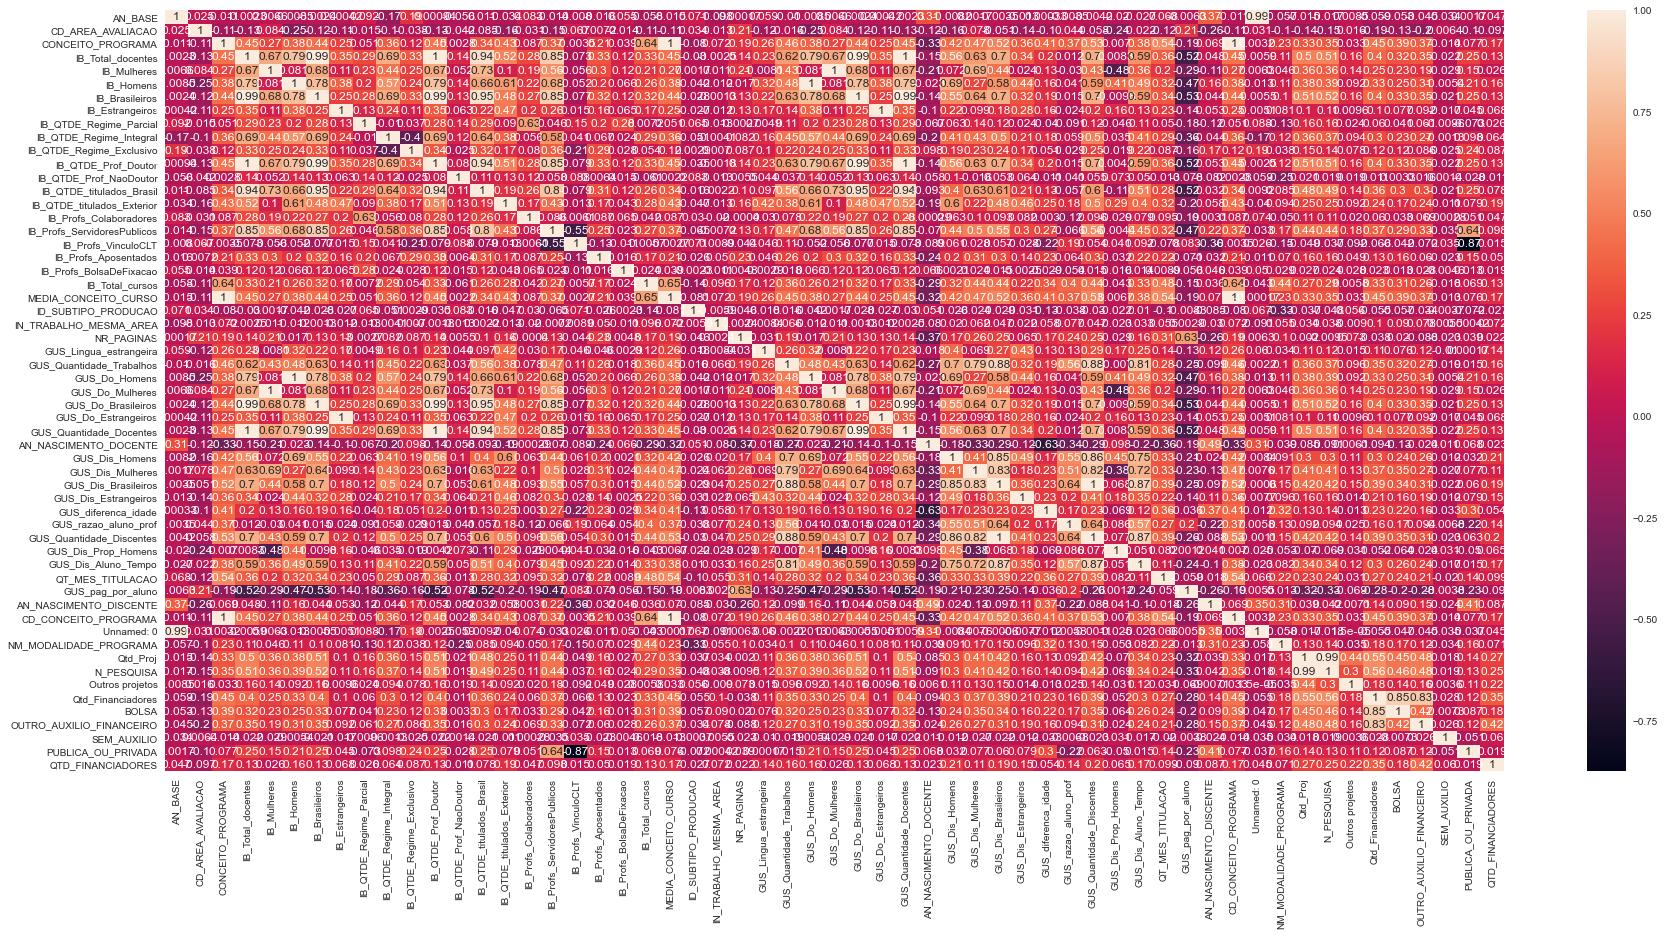

In [38]:
plt.figure(figsize = (30,14))
ax = sns.heatmap(df.corr(), annot = True)
ax = ax

In [39]:
conceito_corr = df.corr()['CONCEITO_PROGRAMA'].to_frame().reset_index()
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'CONCEITO_PROGRAMA', ascending = False)

In [40]:
conceito_corr.head(10)

,index,CONCEITO_PROGRAMA
20,IB_Total_cursos,0.642251
42,QT_MES_TITULACAO,0.544655
39,GUS_Quantidade_Discentes,0.528854
35,GUS_Dis_Brasileiros,0.519086
34,GUS_Dis_Mulheres,0.472953
26,GUS_Quantidade_Trabalhos,0.455015
51,Qtd_Financiadores,0.453580
11,IB_QTDE_Prof_Doutor,0.451934
3,IB_Total_docentes,0.449279
31,GUS_Quantidade_Docentes,0.449279


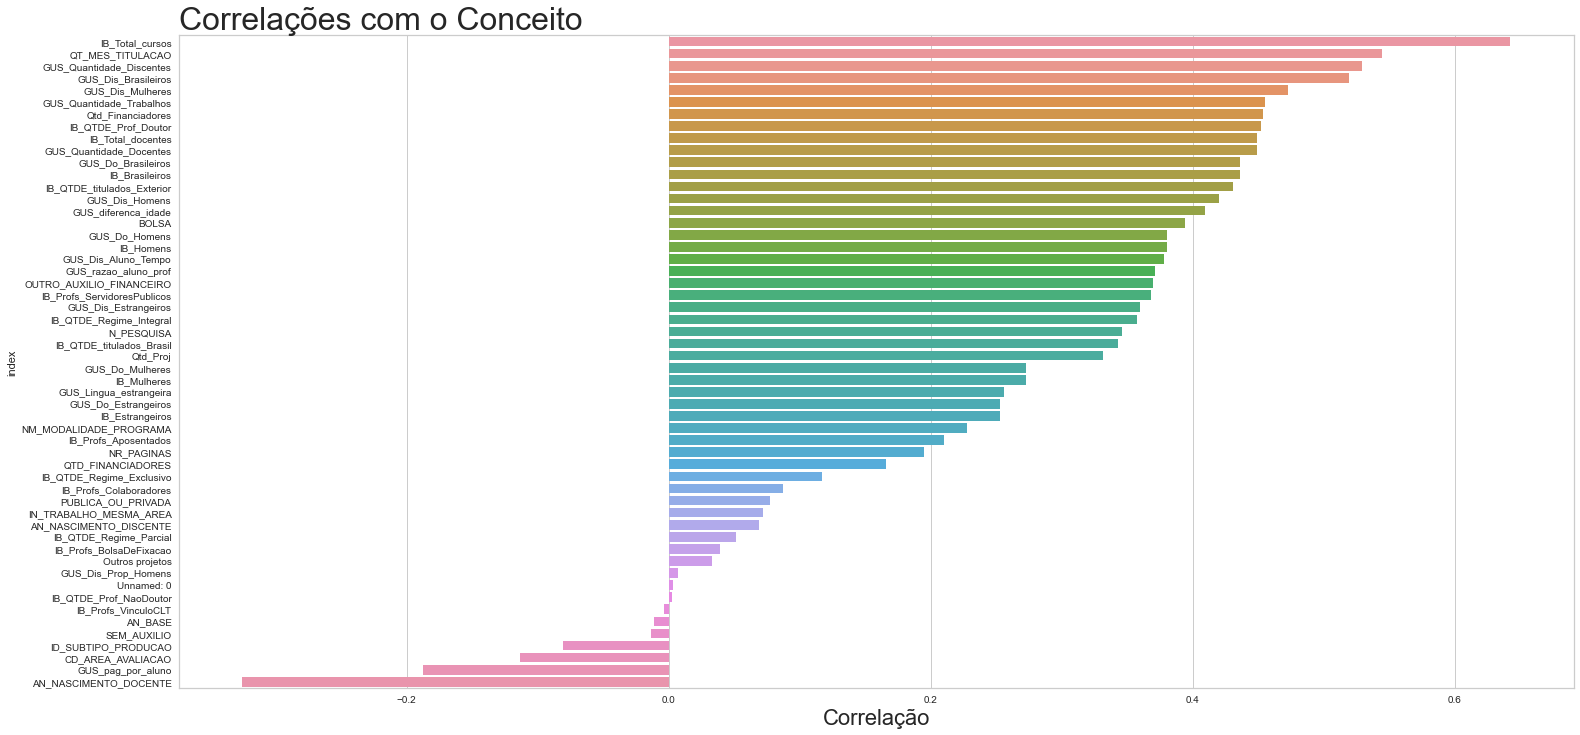

In [41]:
plt.figure(figsize = (25,12))
ax = sns.barplot(data = conceito_corr, y = 'index', x = 'CONCEITO_PROGRAMA')
plt.title("Correlações com o Conceito", fontsize = 32, loc = 'left')
plt.xlabel("Correlação", fontsize = 22)
ax = ax 

In [42]:
conceito_corr['ABS_CONCEITO_PROGRAMA'] = np.abs(conceito_corr['CONCEITO_PROGRAMA'])

In [43]:
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'ABS_CONCEITO_PROGRAMA', ascending = False)

In [44]:
features_com_maior_correlacao = list(conceito_corr.head(10)['index'])
features_com_maior_correlacao

['IB_Total_cursos',
 'QT_MES_TITULACAO',
 'GUS_Quantidade_Discentes',
 'GUS_Dis_Brasileiros',
 'GUS_Dis_Mulheres',
 'GUS_Quantidade_Trabalhos',
 'Qtd_Financiadores',
 'IB_QTDE_Prof_Doutor',
 'IB_Total_docentes',
 'GUS_Quantidade_Docentes']

# Clusterização

In [45]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [61]:
X = df.copy() 

In [62]:
X = X.select_dtypes(exclude = 'object')
X =X.drop(columns=['CD_AREA_AVALIACAO','Unnamed: 0'])
X =X.dropna(axis=1)

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AN_BASE                      20141 non-null  int64  
 1   CONCEITO_PROGRAMA            20141 non-null  int64  
 2   IB_Total_docentes            20141 non-null  int64  
 3   IB_Mulheres                  20141 non-null  int64  
 4   IB_Homens                    20141 non-null  int64  
 5   IB_Brasileiros               20141 non-null  int64  
 6   IB_Estrangeiros              20141 non-null  int64  
 7   IB_QTDE_Regime_Parcial       20141 non-null  int64  
 8   IB_QTDE_Regime_Integral      20141 non-null  int64  
 9   IB_QTDE_Regime_Exclusivo     20141 non-null  int64  
 10  IB_QTDE_Prof_Doutor          20141 non-null  int64  
 11  IB_QTDE_Prof_NaoDoutor       20141 non-null  int64  
 12  IB_QTDE_titulados_Brasil     20141 non-null  int64  
 13  IB_QTDE_titulado

In [64]:
X.head()

,AN_BASE,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO_AUXILIO_FINANCEIRO,SEM_AUXILIO,PUBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,2013,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,0.0,0,21,15,10,25,0,25,1967.560000,29,48,77,0,13.440000,3.080000,77,0.376623,1981.000000,3,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,2014,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,1.0,0,13,14,8,22,0,22,1966.954545,26,43,68,1,16.320817,3.136364,69,0.376812,1983.275362,3,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,2015,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,0.0,0,20,14,8,22,0,22,1971.136364,33,57,88,2,13.174747,4.090909,90,0.366667,1984.311111,3,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,2016,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,0.0,0,18,13,7,20,0,20,1972.200000,28,53,80,1,14.293827,4.050000,81,0.345679,1986.493827,3,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,2017,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,1.0,0,21,14,8,22,0,22,1973.727273,43,64,106,1,13.852167,4.863636,107,0.401869,1987.579439,4,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4


In [67]:
scaler = preprocessing.StandardScaler()

np_X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(np_X, columns= X.columns)


In [69]:
PCA_func = PCA(n_components=2)
dados_pca = PCA_func.fit_transform(scaled_X)

dados_pca = pd.DataFrame(dados_pca)

km_pca = KMeans(n_clusters=3)
km_pca.fit(dados_pca)

dados_pca['labels'] = km_pca.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

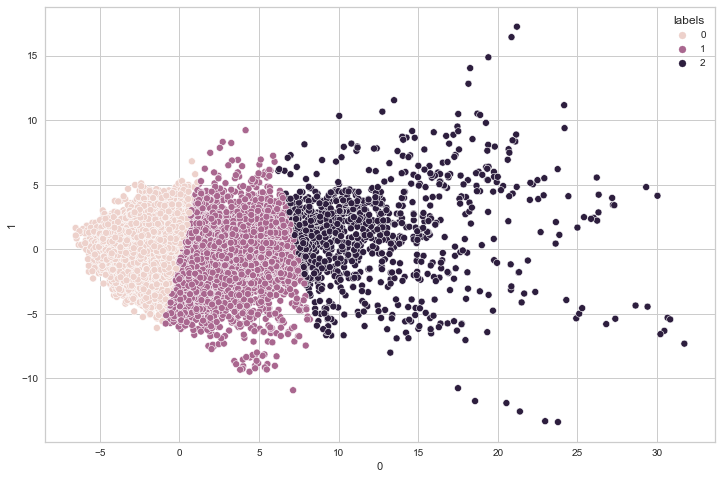

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = dados_pca, x = 0, y = 1, hue = 'labels')

# Otimizando a clusterização

In [30]:
faixa_n_clusters = list(range(2,10))

valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters= k)
    labels = agrupador.fit_predict(df)
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)

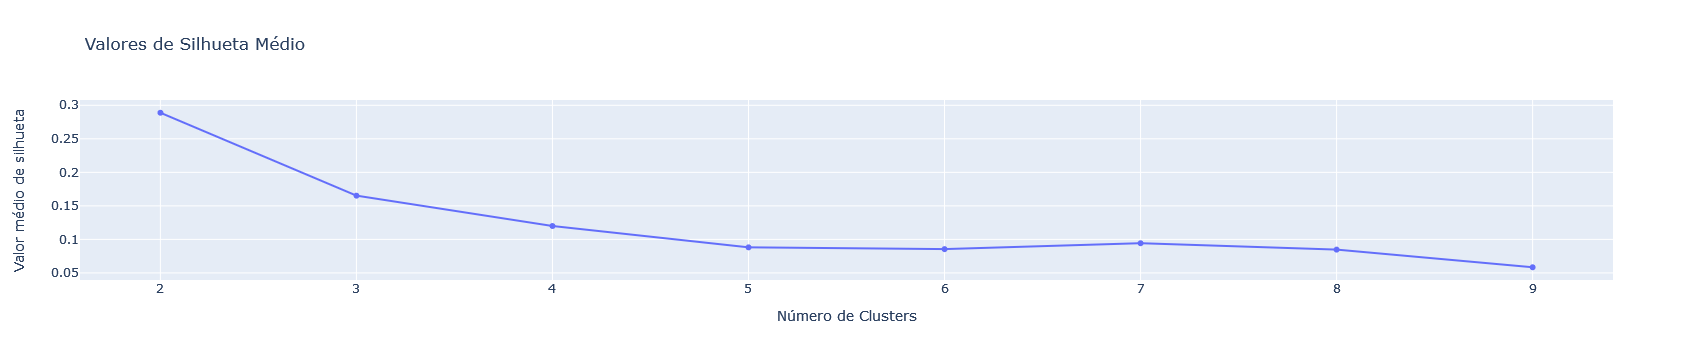

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médio",
    xaxis_title = "Número de Clusters",
    yaxis_title = "Valor médio de silhueta"
)
fig.show()

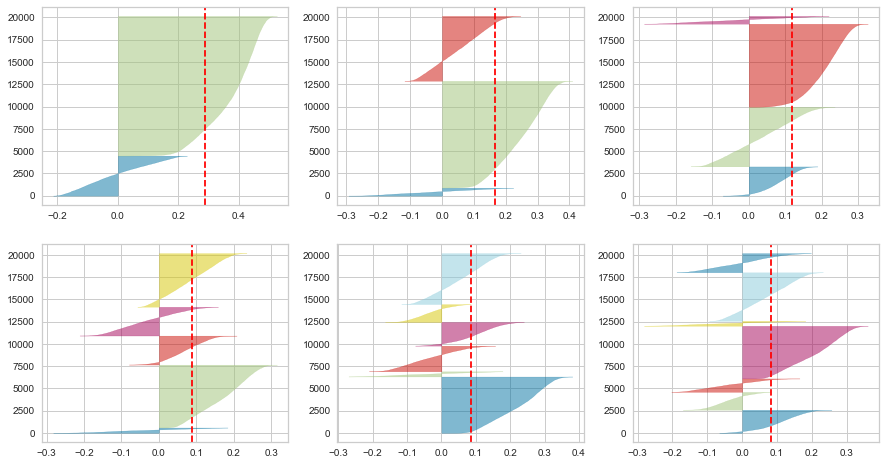

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 3, figsize=(15,8))
for k in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k+1, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)